In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

In [ ]:
data_df = pd.read_csv("/content/tokyo_2020_tweets.csv")

In [ ]:
data_df.head()

In [ ]:
data_df.info()

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(data_df)

In [ ]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Olympics" "Tokyo2020", "TokyoOlympics", "Olympic", "Olympics Tokyo2020", "Tokyo2020 Olympics"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [ ]:

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [ ]:
data_df['text_sentiment'] = data_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'text_sentiment', 'Text')

In [ ]:
show_wordcloud(data_df.loc[data_df['text_sentiment']=='Positive', 'text'], title = 'Prevalent words in texts (Positive sentiment)')

In [ ]:
show_wordcloud(data_df.loc[data_df['text_sentiment']=='Negative', 'text'], title = 'Prevalent words in texts (Negative sentiment)')

In [ ]:
show_wordcloud(data_df.loc[data_df['text_sentiment']=='Neutral', 'text'], title = 'Prevalent words in texts (Neutral sentiment)')

In [ ]:
def find_sentiment_polarity_textblob(post):
    blob = TextBlob(post)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
    return polarity

def find_sentiment_subjectivity_textblob(post):
    blob = TextBlob(post)
    subjectivity = 0
    for sentence in blob.sentences:
        subjectivity += sentence.sentiment.subjectivity
    return subjectivity

In [ ]:
data_df['text_sentiment_polarity'] = data_df['text'].apply(lambda x: find_sentiment_polarity_textblob(x))
data_df['text_sentiment_subjectivity'] = data_df['text'].apply(lambda x: find_sentiment_subjectivity_textblob(x))

In [ ]:
def plot_sentiment_textblob(df, feature, title):
    polarity = df[feature+'_sentiment_polarity']
    subjectivity = df[feature+'_sentiment_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=12)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

In [ ]:
plot_sentiment_textblob(data_df, "text", 'Text')

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

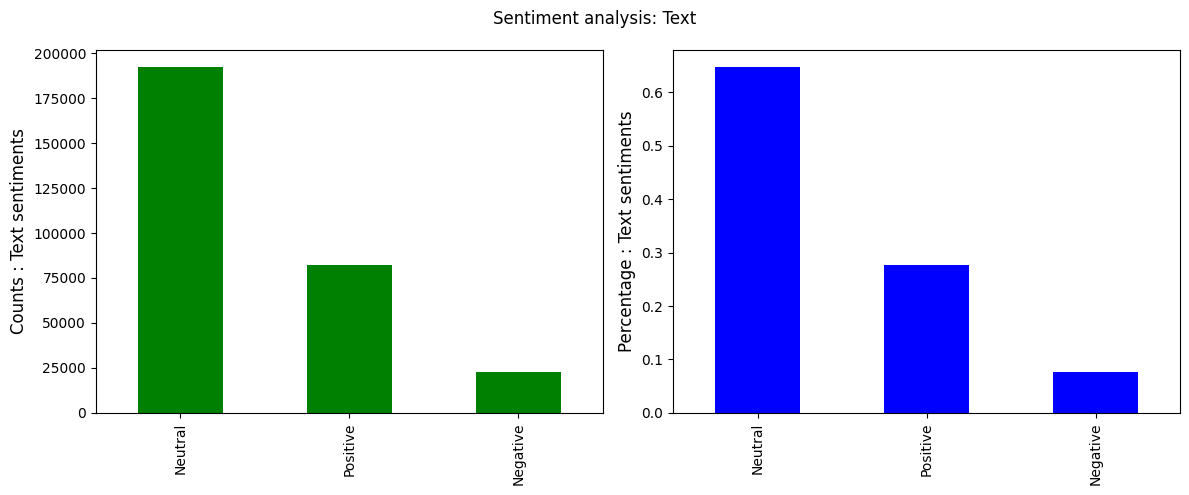

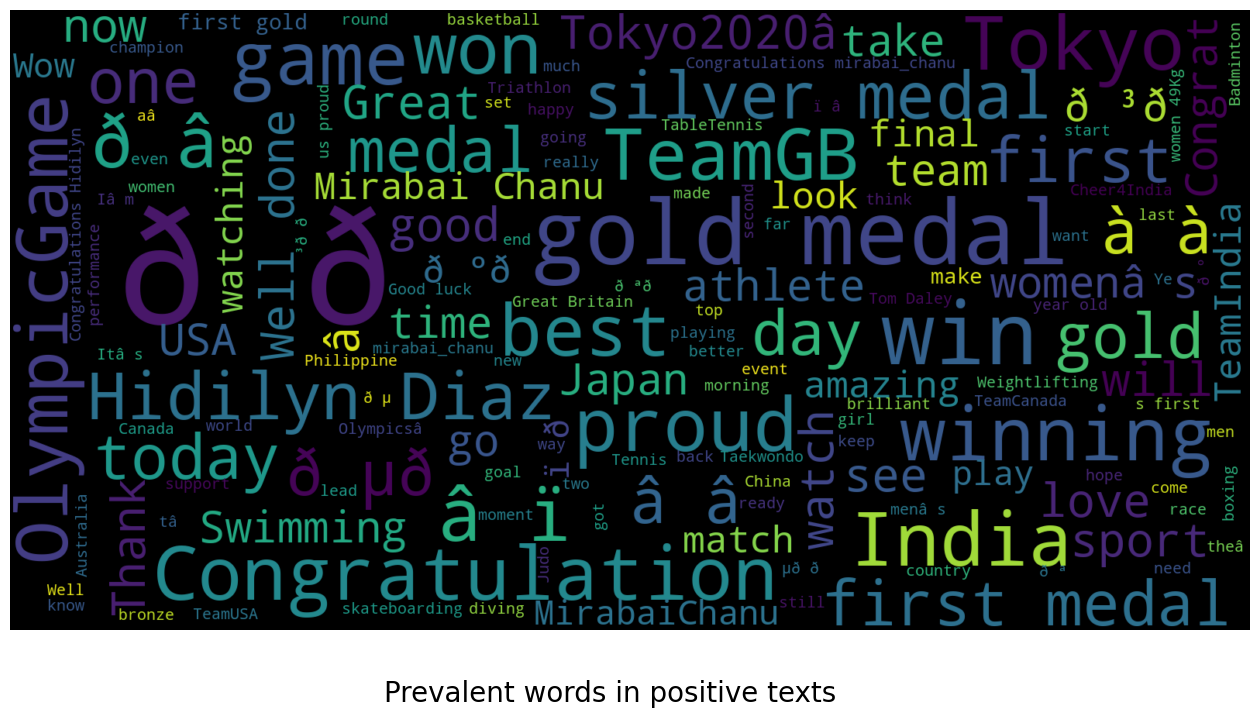

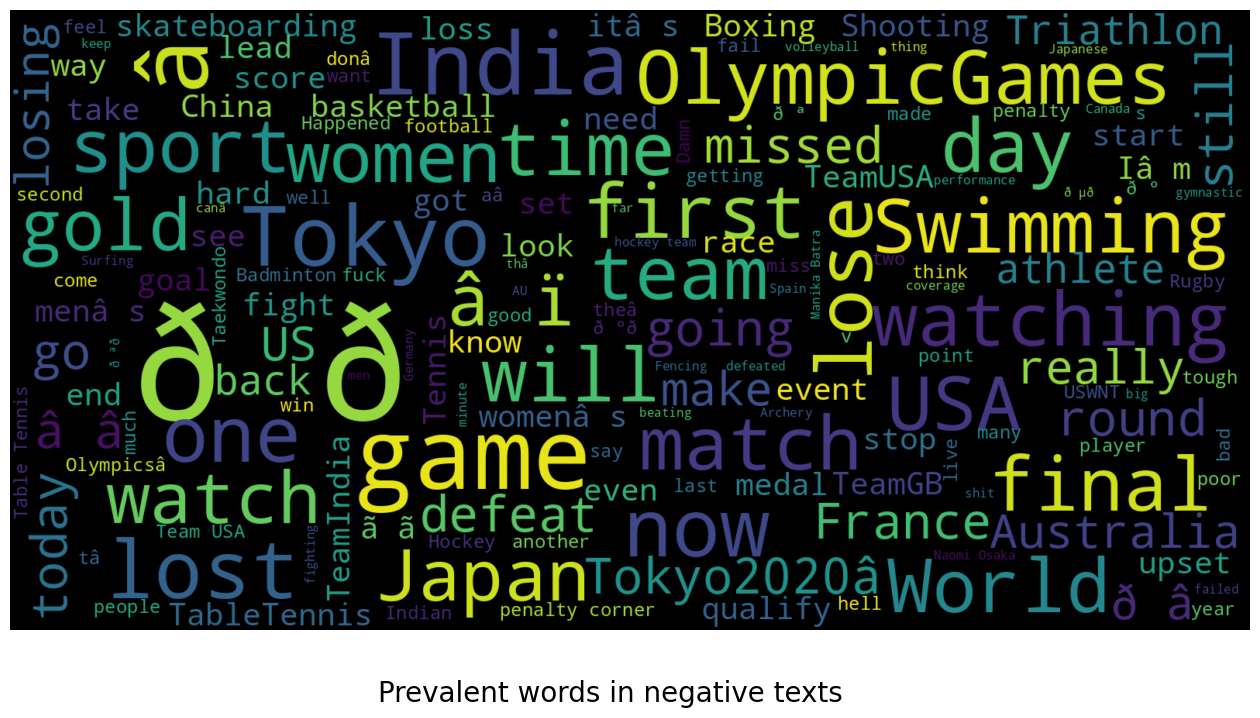

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

# Sample data (replace with your CSV file path)
data_df = pd.read_csv("tokyo_2020_tweets.csv", encoding='latin1', error_bad_lines=False)

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum() / data.isnull().count() * 100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return np.transpose(tt)

def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Olympics", "Tokyo2020", "TokyoOlympics", "Olympic", "Olympics Tokyo2020", "Tokyo2020 Olympics"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500, background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

def find_sentiment(post):
    if isinstance(post, str):
        sia = SentimentIntensityAnalyzer()
        return sia.polarity_scores(post)["compound"]
    else:
        return 0.0

def plot_sentiment(df, feature, title):
    counts = df[feature].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")).value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

def plot_sentiment_textblob(df, feature, title):
    polarity = df[feature]
    subjectivity = df[feature+'_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=12)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

# Sentiment Analysis with Vader
data_df['text_sentiment'] = data_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'text_sentiment', 'Text')

# Show WordClouds
show_wordcloud(data_df.loc[data_df['text_sentiment'] > 0, 'text'], title='Prevalent words in positive texts')
show_wordcloud(data_df.loc[data_df['text_sentiment'] < 0, 'text'], title='Prevalent words in negative texts')

# Sentiment Analysis with TextBlob
def find_sentiment_subjectivity_textblob(post):
    blob = TextBlob(post)
    return blob.sentiment.subjectivity

data_df['text_subjectivity'] = data_df['text'].apply(lambda x: find_sentiment_subjectivity_textblob(x))

plot_sentiment_textblob(data_df, "text_sentiment", 'Text')

# Function to get user description and retweet status based on user ID
def get_user_info(user_id):
    user_data = data_df[data_df['user_id'] == user_id]
    if not user_data.empty:
        description = user_data['user_description'].iloc[0]
        is_retweet = user_data['is_retweet'].iloc[0]
        print("User Description:", description)
        print("Is Retweet:", "Yes" if is_retweet else "No")
    else:
        print("User not found in the dataset.")

# Example usage:
user_id = "1418888645105350000"  # Example user ID, you can change this
get_user_info(user_id)
